In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
sns.set_style('ticks')
sns.set_context('talk')
import warnings; warnings.simplefilter('ignore')

In [4]:
data_dir = '/home/julia/data/ict/'

# Odor response

### Align processed photometry data to odor

In [5]:
mice = ['SHA', 'TAY', 'UUU', 'VVV', 'WEY', 'YOU']

df_all_odor = pd.DataFrame(index=np.arange(-5000, 15000))

for m in mice:
    
    df_mouse = pd.read_pickle(data_dir+"mice/{}.pkl".format(m)).filter(['odor_start', 'gpmt_corr'])
    ts_odor = []
    
    for row in range(len(df_mouse)):
        ts = df_mouse.loc[row, 'gpmt_corr']
        zero_idx = df_mouse.loc[row, 'odor_start'] - 1000  ## this is because we removed 1000 datapoints in the last step
        ts_odor.append(pd.Series(name="{}_{}".format(m,row), data=ts,
                                index=np.arange(-zero_idx, -zero_idx+ts.shape[0])))
    df_odor = pd.DataFrame(index=np.arange(-5000, 15000))        
    df_odor = df_odor.join(ts_odor, how='left')
    np.save(data_dir+"odor_aligned/{}_gpmt_corr.npy".format(m), np.asarray(df_odor))

    df_all_odor = df_all_odor.join(df_odor, how='left')

np.save(data_dir+"odor_aligned/all_gpmt_corr.npy", np.asarray(df_all_odor))

### Plot odor aligned response per mouse

In [6]:
df = pd.read_csv(data_dir+"all_mice.csv", usecols=['dataset', 'type', 'performance', 'day'])
gpmt = np.load(data_dir+"odor_aligned/all_gpmt_corr.npy")
types = ['nogo', 'wait', 'go']
colors = [sns.color_palette('twilight_shifted',10)[i] for i in [-2,-4,2]]
performances = [0,1]

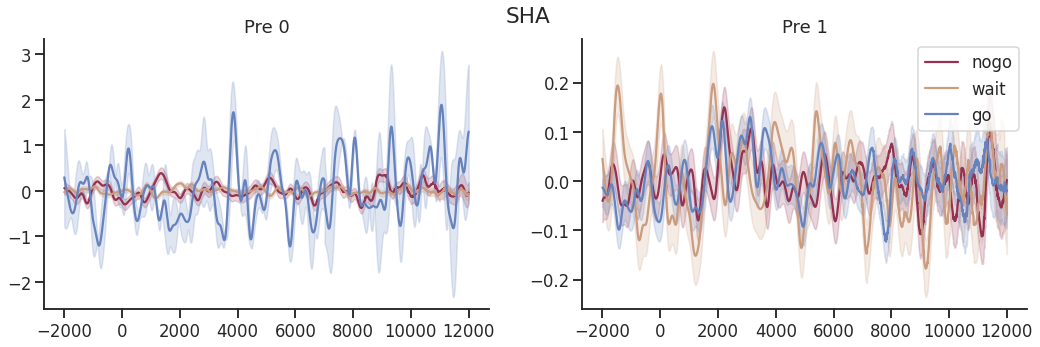

In [7]:
mouse = 'SHA'
days = [range(-8,0)]
period = ['Pre']

fig, ax = plt.subplots(1,2, figsize=(15,5))
for d in range(len(days)):
    for p in performances:
        for c in range(len(types)):
            idcs = df[(df['type']==types[c]) & (df['performance']==p) & 
                      (df['dataset'].str.contains(mouse)) & (df['day'].isin(days[d]))].index

            x = np.arange(-2000, 12000)
            y = np.nanmean(gpmt[:,idcs], axis=1)[3000:17000]
            sem = stats.sem(gpmt[:,idcs][3000:17000], axis=1, nan_policy='omit')

            ax[p].plot(x, y, color=colors[c], label="{}".format(types[c]))
            ax[p].fill_between(x, (y-sem), (y+sem), color=colors[c], alpha=.2)
            ax[p].set_title('{} {}'.format(period[d], p))
            sns.despine()
ax[p].legend()
fig.suptitle("{}".format(mouse));
plt.tight_layout();

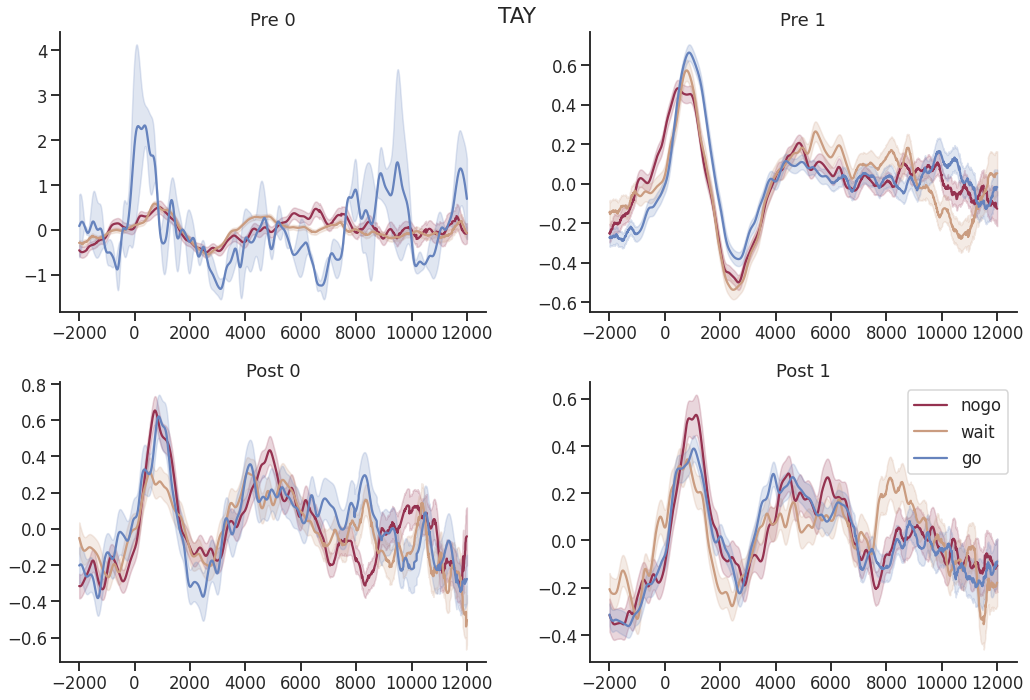

In [22]:
mouse = 'TAY'
days = [range(-7,0), range(0,6)]
period = ['Pre', 'Post']

fig, ax = plt.subplots(2,2, figsize=(15,10))
for d in range(len(days)):
    for p in performances:
        for c in range(len(types)):
            idcs = df[(df['type']==types[c]) & (df['performance']==p) & 
                      (df['dataset'].str.contains(mouse)) & (df['day'].isin(days[d]))].index

            x = np.arange(-2000, 12000)
            y = np.nanmean(gpmt[:,idcs], axis=1)[3000:17000]
            sem = stats.sem(gpmt[:,idcs][3000:17000], axis=1, nan_policy='omit')

            ax[d,p].plot(x, y, color=colors[c], label="{}".format(types[c]))
            ax[d,p].fill_between(x, (y-sem), (y+sem), color=colors[c], alpha=.2)
            ax[d,p].set_title('{} {}'.format(period[d], p))
            sns.despine()
ax[d,p].legend()
fig.suptitle("{}".format(mouse));
plt.tight_layout();

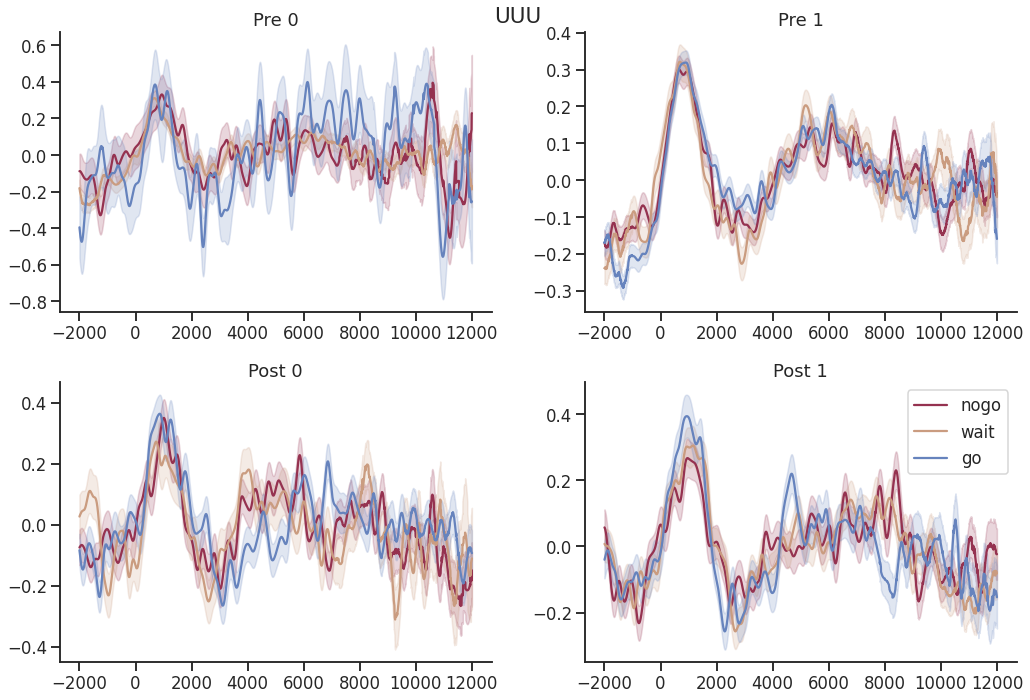

In [23]:
mouse = 'UUU'
days = [range(-11,0), range(0,8)]
period = ['Pre', 'Post']

fig, ax = plt.subplots(2,2, figsize=(15,10))
for d in range(len(days)):
    for p in performances:
        for c in range(len(types)):
            idcs = df[(df['type']==types[c]) & (df['performance']==p) & 
                      (df['dataset'].str.contains(mouse)) & (df['day'].isin(days[d]))].index

            x = np.arange(-2000, 12000)
            y = np.nanmean(gpmt[:,idcs], axis=1)[3000:17000]
            sem = stats.sem(gpmt[:,idcs][3000:17000], axis=1, nan_policy='omit')

            ax[d,p].plot(x, y, color=colors[c], label="{}".format(types[c]))
            ax[d,p].fill_between(x, (y-sem), (y+sem), color=colors[c], alpha=.2)
            ax[d,p].set_title('{} {}'.format(period[d], p))
            sns.despine()
ax[d,p].legend()
fig.suptitle("{}".format(mouse));
plt.tight_layout();

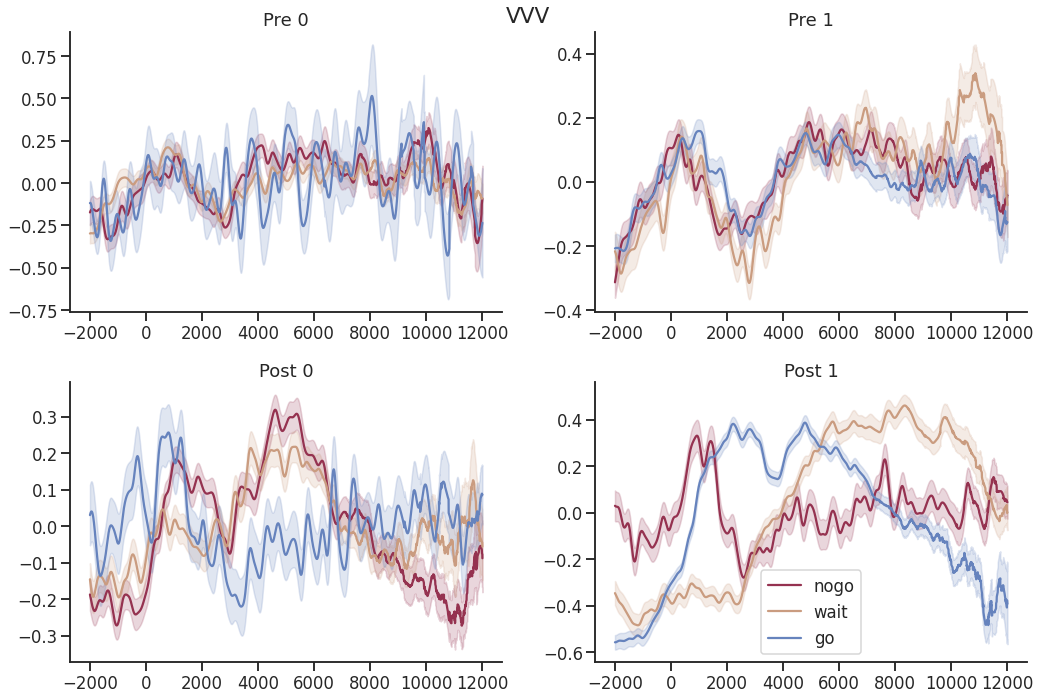

In [24]:
mouse = 'VVV'
days = [range(-5,0), range(0,6)]
period = ['Pre', 'Post']

fig, ax = plt.subplots(2,2, figsize=(15,10))
for d in range(len(days)):
    for p in performances:
        for c in range(len(types)):
            idcs = df[(df['type']==types[c]) & (df['performance']==p) & 
                      (df['dataset'].str.contains(mouse)) & (df['day'].isin(days[d]))].index

            x = np.arange(-2000, 12000)
            y = np.nanmean(gpmt[:,idcs], axis=1)[3000:17000]
            sem = stats.sem(gpmt[:,idcs][3000:17000], axis=1, nan_policy='omit')

            ax[d,p].plot(x, y, color=colors[c], label="{}".format(types[c]))
            ax[d,p].fill_between(x, (y-sem), (y+sem), color=colors[c], alpha=.2)
            ax[d,p].set_title('{} {}'.format(period[d], p))
            sns.despine()
ax[d,p].legend()
fig.suptitle("{}".format(mouse));
plt.tight_layout();

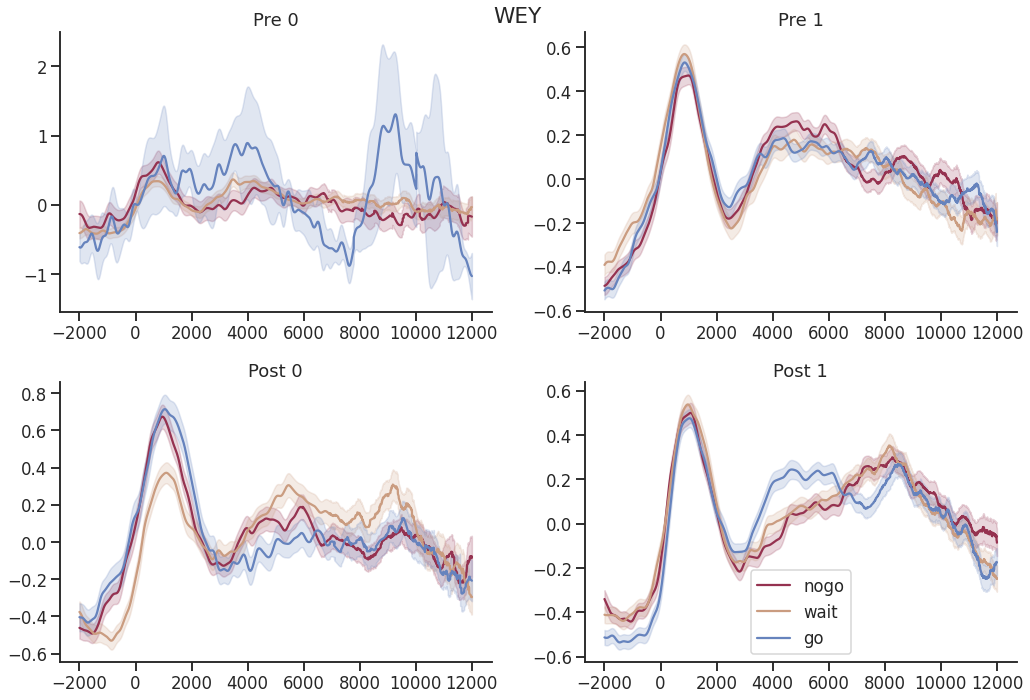

In [29]:
mouse = 'WEY'
days = [range(-7,0), range(0,10)]
period = ['Pre', 'Post']

fig, ax = plt.subplots(2,2, figsize=(15,10))
for d in range(len(days)):
    for p in performances:
        for c in range(len(types)):
            idcs = df[(df['type']==types[c]) & (df['performance']==p) & 
                      (df['dataset'].str.contains(mouse)) & (df['day'].isin(days[d]))].index

            x = np.arange(-2000, 12000)
            y = np.nanmean(gpmt[:,idcs], axis=1)[3000:17000]
            sem = stats.sem(gpmt[:,idcs][3000:17000], axis=1, nan_policy='omit')

            ax[d,p].plot(x, y, color=colors[c], label="{}".format(types[c]))
            ax[d,p].fill_between(x, (y-sem), (y+sem), color=colors[c], alpha=.2)
            ax[d,p].set_title('{} {}'.format(period[d], p))
            sns.despine()
ax[d,p].legend()
fig.suptitle("{}".format(mouse));
plt.tight_layout();

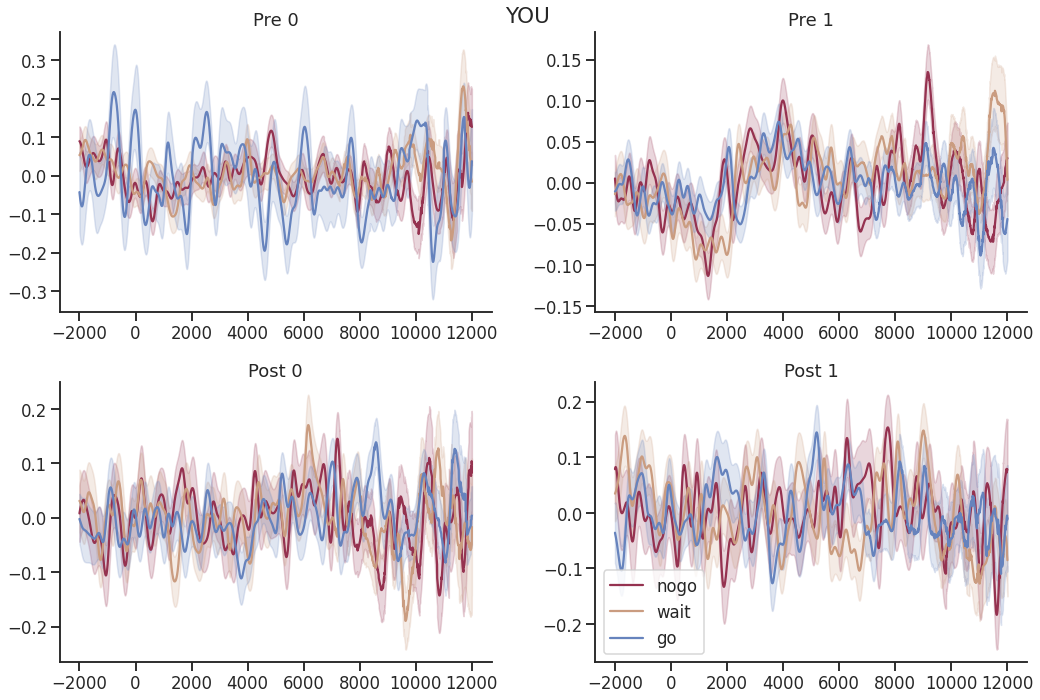

In [11]:
mouse = 'YOU'
days = [range(-6,0), range(0,4)]
period = ['Pre', 'Post']

fig, ax = plt.subplots(2,2, figsize=(15,10))
for d in range(len(days)):
    for p in performances:
        for c in range(len(types)):
            idcs = df[(df['type']==types[c]) & (df['performance']==p) & 
                      (df['dataset'].str.contains(mouse)) & (df['day'].isin(days[d]))].index

            x = np.arange(-2000, 12000)
            y = np.nanmean(gpmt[:,idcs], axis=1)[3000:17000]
            sem = stats.sem(gpmt[:,idcs][3000:17000], axis=1, nan_policy='omit')

            ax[d,p].plot(x, y, color=colors[c], label="{}".format(types[c]))
            ax[d,p].fill_between(x, (y-sem), (y+sem), color=colors[c], alpha=.2)
            ax[d,p].set_title('{} {}'.format(period[d], p))
            sns.despine()
ax[d,p].legend()
fig.suptitle("{}".format(mouse));
plt.tight_layout();

## Average across all mice

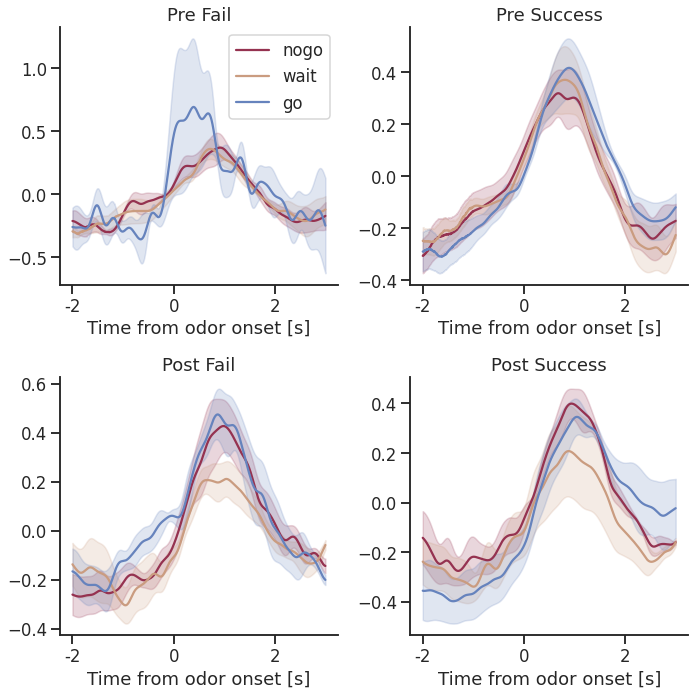

In [10]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
mice = ['TAY', 'UUU', 'VVV', 'WEY']
periods = ['Pre', 'Post']
perfs = ['Fail', 'Success']

for period in range(len(periods)):
    for c in range(len(types)):
        for p in performances:
            L = np.zeros((gpmt.shape[0], len(mice)))
            for m in range(len(mice)):
                if period == 0:
                    idcs = df[(df['type']==types[c]) & (df['performance']==p) & 
                              (df['dataset'].str.contains(mice[m])) & (df['day']<0)].index
                elif period == 1:
                    idcs = df[(df['type']==types[c]) & (df['performance']==p) & 
                              (df['dataset'].str.contains(mice[m])) & (df['day']>=0)].index
                L[:,m] = np.nanmean(gpmt[:,idcs], axis=1)

            x = np.arange(-2000, 3000)
            y = np.nanmean(L[3000:8000], axis=1)
            sem = stats.sem(L[3000:8000], axis=1, nan_policy='omit')

            ax[period,p].plot(x, y, color=colors[c], label="{}".format(types[c]))
            ax[period,p].fill_between(x, (y-sem), (y+sem), color=colors[c], alpha=.2)
            ax[period,p].set_xticks([-2000, 0, 2000])
            ax[period,p].set_xticklabels([-2,0,2])
            ax[period,p].set_xlabel('Time from odor onset [s]')
            ax[period,p].set_title('{} {}'.format(periods[period], perfs[p]))
            sns.despine()

ax[0,0].legend()
plt.tight_layout()

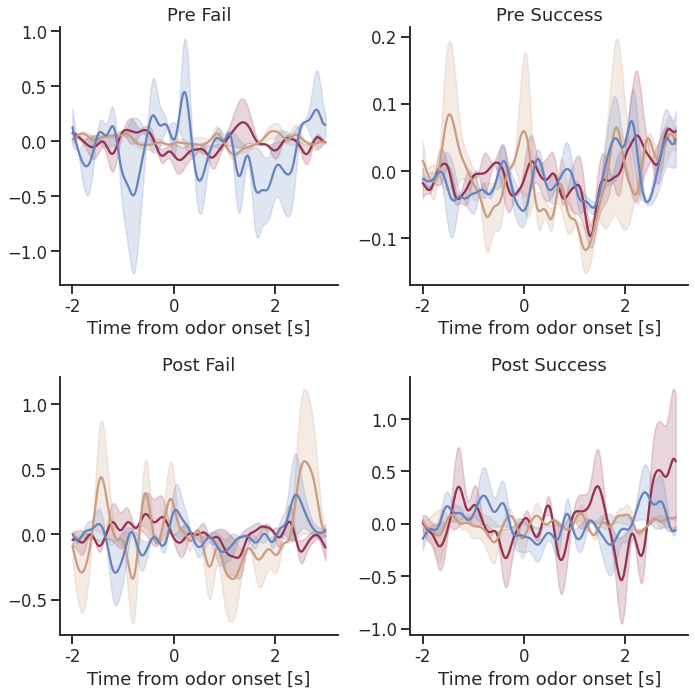

In [14]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
mice = ['SHA', 'YOU']
periods = ['Pre', 'Post']

for period in range(len(periods)):
    for c in range(len(types)):
        for p in performances:
            L = np.zeros((gpmt.shape[0], len(mice)))
            for m in range(len(mice)):
                if period == 0:
                    idcs = df[(df['type']==types[c]) & (df['performance']==p) & 
                              (df['dataset'].str.contains(mice[m])) & (df['day']<0)].index
                elif period == 1:
                    idcs = df[(df['type']==types[c]) & (df['performance']==p) & 
                              (df['dataset'].str.contains(mice[m])) & (df['day']>=0)].index
                L[:,m] = np.nanmean(gpmt[:,idcs], axis=1)

            x = np.arange(-2000, 3000)
            y = np.nanmean(L[3000:8000], axis=1)
            sem = stats.sem(L[3000:8000], axis=1, nan_policy='omit')

            ax[period,p].plot(x, y, color=colors[c], label="{}".format(types[c]))
            ax[period,p].fill_between(x, (y-sem), (y+sem), color=colors[c], alpha=.2)
            ax[period,p].set_xticks([-2000, 0, 2000])
            ax[period,p].set_xticklabels([-2,0,2])
            ax[period,p].set_xlabel('Time from odor onset [s]')
            ax[period,p].set_title('{} {}'.format(periods[period], perfs[p]))
            sns.despine()

#ax[0,1].legend()
plt.tight_layout()

# Decision period 

In [26]:
df = pd.read_csv(data_dir+"all_mice.csv", usecols=['dataset', 'type', 'performance', 'day', 
                                                   'odor_start', 'iti_start'])
gpmt = np.load(data_dir+"odor_aligned/all_gpmt_corr.npy")
types = ['NoGo', 'Wait', 'Go']
colors = [sns.color_palette('twilight_shifted',10)[i] for i in [-2,2]]
performances = [0,1]

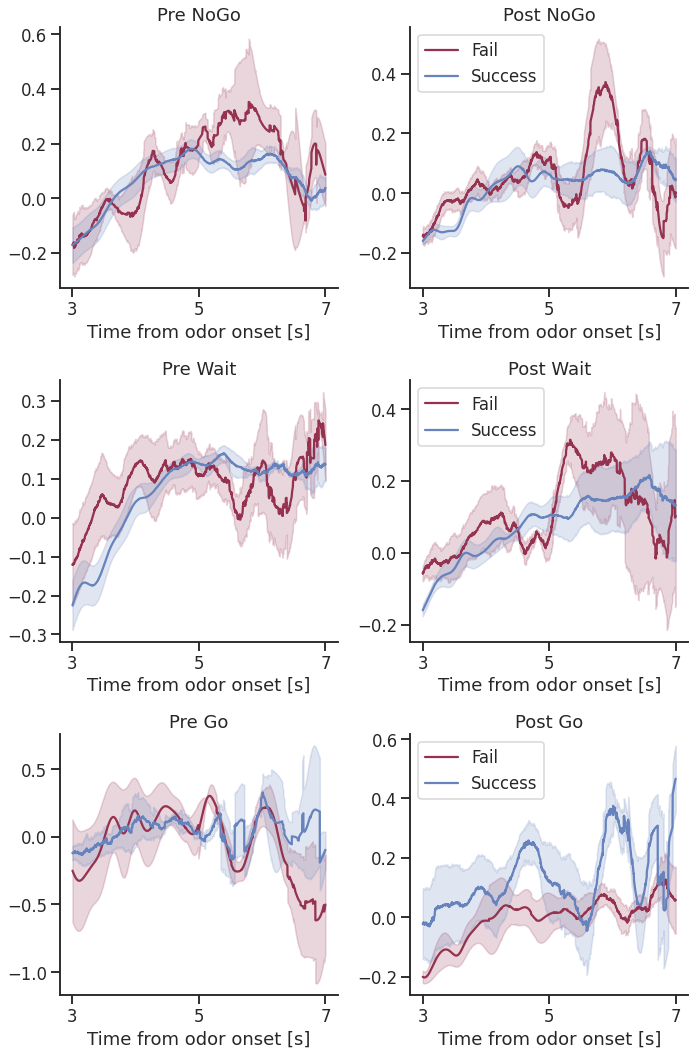

In [27]:
fig, ax = plt.subplots(3,2, figsize=(10,15))
mice = ['TAY', 'UUU', 'VVV', 'WEY']
periods = ['Pre', 'Post']

for c in range(len(types)):
    for period in range(len(periods)):
        for p in performances:
            L = np.zeros((10000, len(mice)))
            for m in range(len(mice)):
                if period == 0:
                    df_select = df[(df['type']==types[c].lower()) & (df['performance']==p) & 
                                (df['dataset'].str.contains(mice[m])) & (df['day']<0)]
                elif period == 1:
                    df_select = df[(df['type']==types[c].lower()) & (df['performance']==p) & 
                                (df['dataset'].str.contains(mice[m])) & (df['day']>=0)]
                
                # Extract only decision period for each trial
                decision = []
                for row in range(len(df_select)):
                    end = 5000 + (df_select.iloc[row]['iti_start'] - df_select.iloc[row]['odor_start'])
                    decision.append(pd.Series(data=gpmt[8000:end+1, df_select.iloc[row].name], 
                                              name=df_select.iloc[row].name))                    
                
                df_decision = pd.DataFrame(index=np.arange(0, 10000))        
                df_decision = df_decision.join(decision, how='left')
                                 
                # add to array for all mice                 
                L[:,m] = np.nanmean(np.asarray(df_decision), axis=1)
                 
                
            x = np.arange(3000, 7000)
            y = np.nanmean(L[:4000], axis=1)
            sem = stats.sem(L[:4000], axis=1, nan_policy='omit')

            ax[c, period].plot(x, y, color=colors[p], label="{}".format(perfs[p]))
            ax[c, period].fill_between(x, (y-sem), (y+sem), color=colors[p], alpha=.2)
            ax[c, period].set_xticks([3000, 5000, 7000])
            ax[c, period].set_xticklabels([3,5,7])
            ax[c, period].set_xlabel('Time from odor onset [s]')
            ax[c, period].set_title('{} {}'.format(periods[period], types[c]))
            sns.despine()

    ax[c,period].legend()
plt.tight_layout()

# US response

### Align processed data to ITI

In [5]:
mice = ['SHA', 'TAY', 'UUU', 'VVV', 'WEY', 'YOU']

df_all_iti = pd.DataFrame(index=np.arange(-10000, 10000))

for m in mice:
    df_mouse = pd.read_pickle(data_dir+"mice/{}.pkl".format(m)).filter(['iti_start', 'gpmt_corr'])
    ts_iti = []
    
    for row in range(len(df_mouse)):
        ts = df_mouse.loc[row, 'gpmt_corr']
        zero_idx = df_mouse.loc[row, 'iti_start']
        ts_iti.append(pd.Series(name="{}_{}".format(m,row), data=ts,
                                index=np.arange(-zero_idx, -zero_idx+ts.shape[0])))
    df_iti = pd.DataFrame(index=np.arange(-10000, 10000))        
    df_iti = df_iti.join(ts_iti, how='left')
    np.save("/home/julia/data/ict/iti_aligned/{}_gpmt_corr.npy".format(m), np.asarray(df_iti))

    df_all_iti = df_all_iti.join(df_iti, how='left')
np.save("/home/julia/data/ict/iti_aligned/all_gpmt_corr.npy", np.asarray(df_all_iti))

In [28]:
df = pd.read_csv(data_dir+"all_mice.csv", usecols=['dataset', 'type', 'performance', 'day'])
types = ['nogo', 'wait', 'go']
colors = [sns.color_palette('twilight_shifted',10)[i] for i in [-2,-4,2]]
performances = [0,1]

In [29]:
gpmt = np.load("/home/julia/data/ict/iti_aligned/all_gpmt_corr.npy")

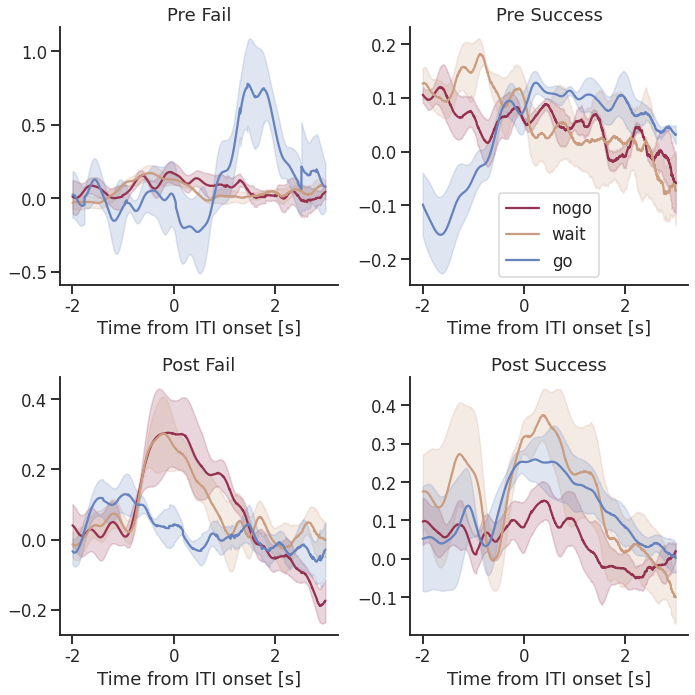

In [31]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
mice = ['TAY', 'UUU', 'VVV', 'WEY']
periods = ['Pre', 'Post']

for period in range(len(periods)):
    for c in range(len(types)):
        for p in performances:
            L = np.zeros((gpmt.shape[0], len(mice)))
            for m in range(len(mice)):
                if period == 0:
                    idcs = df[(df['type']==types[c]) & (df['performance']==p) & 
                              (df['dataset'].str.contains(mice[m])) & (df['day']<0)].index
                elif period == 1:
                    idcs = df[(df['type']==types[c]) & (df['performance']==p) & 
                              (df['dataset'].str.contains(mice[m])) & (df['day']>=0)].index
                L[:,m] = np.nanmean(gpmt[:,idcs], axis=1)

            x = np.arange(-2000, 3000)
            y = np.nanmean(L[8000:13000], axis=1)
            sem = stats.sem(L[8000:13000], axis=1, nan_policy='omit')

            ax[period,p].plot(x, y, color=colors[c], label="{}".format(types[c]))
            ax[period,p].fill_between(x, (y-sem), (y+sem), color=colors[c], alpha=.2)
            ax[period,p].set_xticks([-2000, 0, 2000])
            ax[period,p].set_xticklabels([-2,0,2])
            ax[period,p].set_xlabel('Time from ITI onset [s]')
            ax[period,p].set_title('{} {}'.format(periods[period], perfs[p]))
            sns.despine()

ax[0,1].legend()
plt.tight_layout()

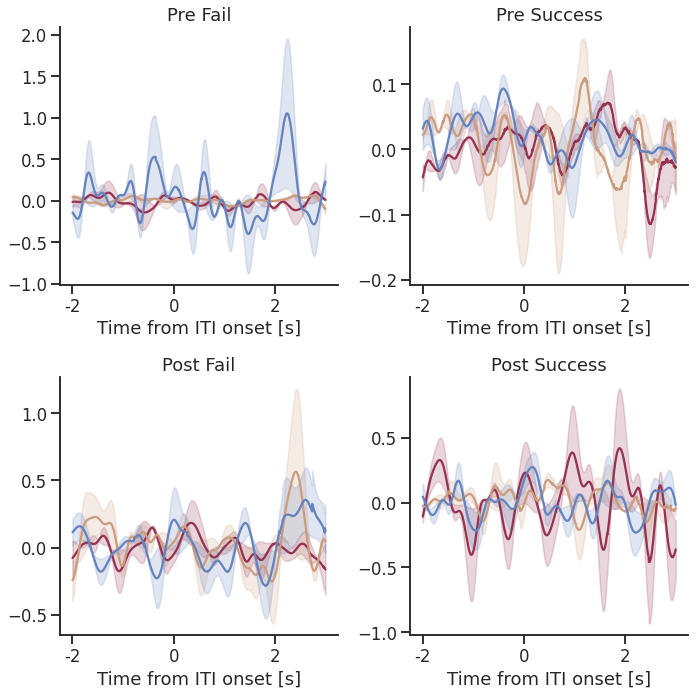

In [32]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
mice = ['SHA', 'YOU']
periods = ['Pre', 'Post']

for period in range(len(periods)):
    for c in range(len(types)):
        for p in performances:
            L = np.zeros((gpmt.shape[0], len(mice)))
            for m in range(len(mice)):
                if period == 0:
                    idcs = df[(df['type']==types[c]) & (df['performance']==p) & 
                              (df['dataset'].str.contains(mice[m])) & (df['day']<0)].index
                elif period == 1:
                    idcs = df[(df['type']==types[c]) & (df['performance']==p) & 
                              (df['dataset'].str.contains(mice[m])) & (df['day']>=0)].index
                L[:,m] = np.nanmean(gpmt[:,idcs], axis=1)

            x = np.arange(-2000, 3000)
            y = np.nanmean(L[8000:13000], axis=1)
            sem = stats.sem(L[8000:13000], axis=1, nan_policy='omit')

            ax[period,p].plot(x, y, color=colors[c], label="{}".format(types[c]))
            ax[period,p].fill_between(x, (y-sem), (y+sem), color=colors[c], alpha=.2)
            ax[period,p].set_xticks([-2000, 0, 2000])
            ax[period,p].set_xticklabels([-2,0,2])
            ax[period,p].set_xlabel('Time from ITI onset [s]')
            ax[period,p].set_title('{} {}'.format(periods[period], perfs[p]))
            sns.despine()

#ax[0,1].legend()
plt.tight_layout()

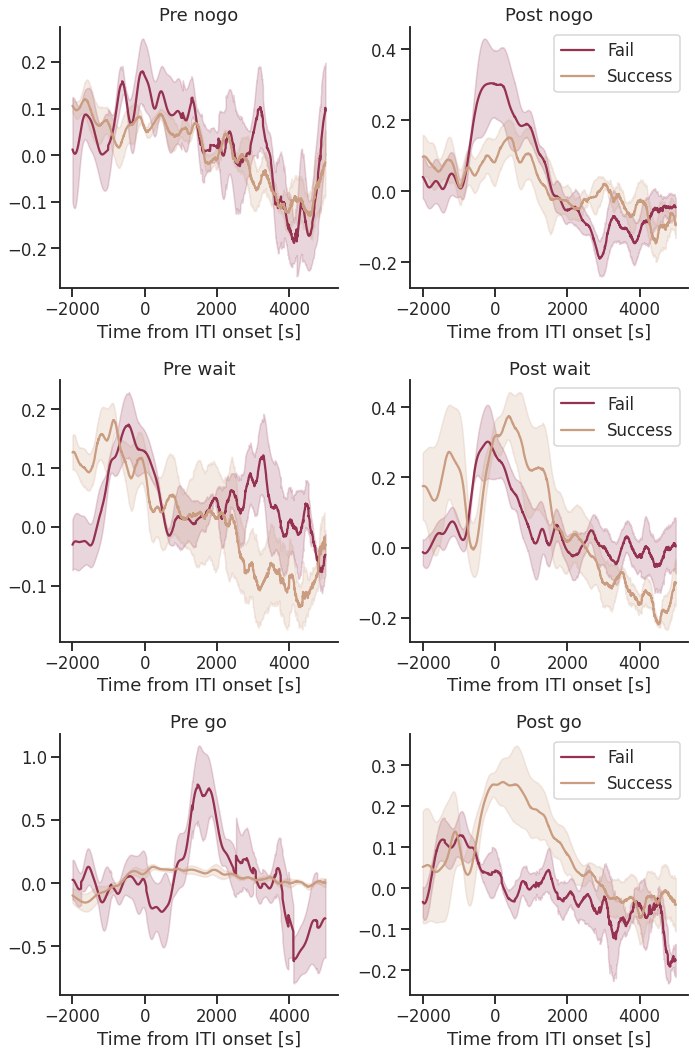

In [22]:
fig, ax = plt.subplots(3,2, figsize=(10,15))
mice = ['TAY', 'UUU', 'VVV', 'WEY']
periods = ['Pre', 'Post']

for c in range(len(types)):
    for period in range(len(periods)):
        for p in performances:
            L = np.zeros((20000, len(mice)))
            for m in range(len(mice)):
                if period == 0:
                    idcs = df[(df['type']==types[c]) & (df['performance']==p) & 
                                (df['dataset'].str.contains(mice[m])) & (df['day']<0)].index
                elif period == 1:
                    idcs = df[(df['type']==types[c]) & (df['performance']==p) & 
                                (df['dataset'].str.contains(mice[m])) & (df['day']>=0)].index
                                                 
                # add to array for all mice                 
                L[:,m] = np.nanmean(gpmt[:,idcs], axis=1)
                 
                
            x = np.arange(-2000, 5000)
            y = np.nanmean(L[8000:15000], axis=1)
            sem = stats.sem(L[8000:15000], axis=1, nan_policy='omit')

            ax[c, period].plot(x, y, color=colors[p], label="{}".format(perfs[p]))
            ax[c, period].fill_between(x, (y-sem), (y+sem), color=colors[p], alpha=.2)
            #ax[c, period].set_xticks([3000, 5000, 7000])
            #ax[c, period].set_xticklabels([3,5,7])
            ax[c, period].set_xlabel('Time from ITI onset [s]')
            ax[c, period].set_title('{} {}'.format(periods[period], types[c]))
            sns.despine()

    ax[c,period].legend()
plt.tight_layout()